In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [51]:
df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [52]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [53]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [54]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [55]:
df.drop('Car_Name',axis=1,inplace=True)

In [56]:
# plt.scatter(x=df['Selling_Price'],y=df['Present_Price'])

## Encoding the data

In [57]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [58]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [59]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [60]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


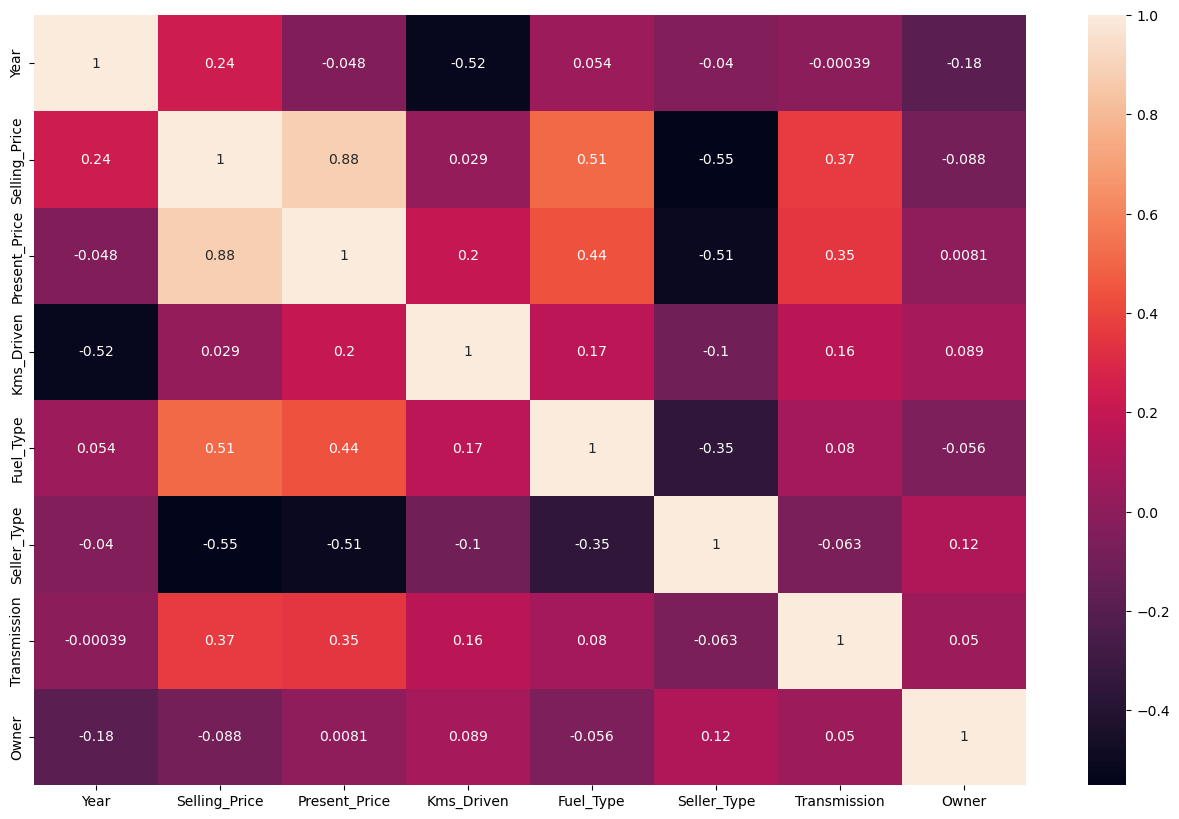

In [61]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [62]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## SUPPORT-VECTOR-MACHINE

In [64]:
from sklearn.svm import SVR


S=SVR(C=1,epsilon=1,kernel='rbf',gamma='scale')

S.fit(X_train,y_train)
pred1=S.predict(X_test)# testing

pred12=S.predict(X_train)#trainng

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test,pred1))
print(mean_absolute_error(y_test,pred1))
print(r2_score(y_test,pred1))

29.105757846318667
3.3347260253699575
-0.059381095473693524


## prediction for training data

In [66]:
print(mean_squared_error(y_train,pred12))
print(mean_absolute_error(y_train,pred12))
print(r2_score(y_train,pred12))

26.528142476018022
3.150846767284629
-0.05456986565906852


Text(0, 0.5, 'predicted prices')

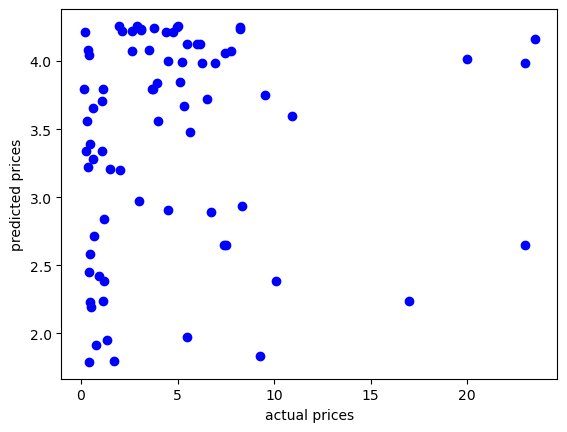

In [67]:

plt.scatter(y_test,pred1,color='blue')

plt.xlabel("actual prices")
plt.ylabel("predicted prices")


## LINEAR REGRESSION

In [68]:
X=df['Present_Price'].values
#print(X)
X=X[:,np.newaxis]
#print(X)
Y=df['Selling_Price'].values
#print(Y)
Y=Y[:,np.newaxis]
#print(Y)

In [70]:

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [71]:
LR=LinearRegression()
LR.fit(X_train,y_train)
model2=LR.predict(X_test)

model12=LR.predict(X_train)

In [72]:
print(mean_squared_error(y_test,model2))
print(mean_absolute_error(y_test,model2))
print(r2_score(y_test,model2))

6.60196281302094
1.706212928374979
0.7597040889962836


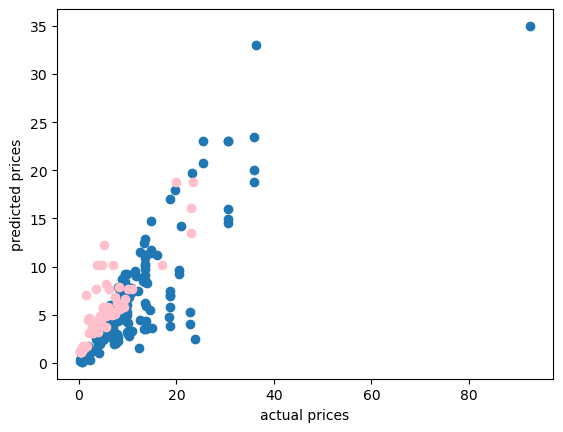

In [73]:
plt.scatter(X,Y)
plt.scatter(y_test,model2,color='pink')
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.show()